In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Simple Linear Regression With One Variable

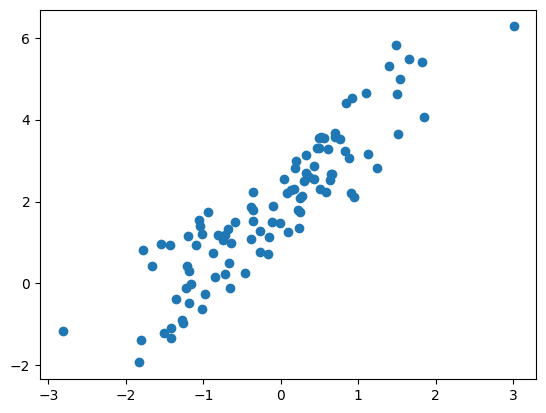

In [56]:
# Generate Data
X = np.random.randn(100).reshape(-1, 1)
w = np.random.uniform(low=1, high=2, size=(100, 1))
b = np.random.uniform(low=1, high=3, size=(100, 1))
y = w * X + b
plt.scatter(X, y)

In [57]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


### Shape of X = (n, m) where n is the number of data points and m is the number of features. In this example, n = 100 and m = 1 for simple linear regression with one feature.
### Shape of y = (n, 1) since in regression we are just predicting one output for each data point.

### For this simple problem there is no need for a hidden layer, just an input and output layer suffices.
### Shape of w = (input_nodes, output_nodes). In this example, input_nodes = 1 and output_nodes = 1 for linear regression.
### Shape of b = (n, output_nodes). We can actually just set the shape of b to be (1, output_nodes) and just let broadcasting deal with manipulating the shape when it needs to.

## Forward
$ \Large \hat{y} = X \cdot w + b $

### Shape of $ \hat{y} $ = (100, 1)

## Calculate Loss
$ L = \Large\frac{\Sigma(\hat{y}-y)^2}{n} $

# Calculate Gradients
## Weights
$ \Large \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial w} $
  
$ \Large \frac{\partial L}{\partial \hat{y}} = 2 * (\hat{y} - y) $

### Shape of $ \frac{\partial L}{\partial \hat{y}} $ = (100, 1)

$ \Large \frac{\partial \hat{y}}{\partial w} = X^T $

### Shape of $ \frac{\partial \hat{y}}{\partial w} $ = (1, 100)

$ \Large \frac{\partial L}{\partial w} = \frac{1}{n} * (\frac{\partial \hat{y}}{\partial w} \cdot \frac{\partial L}{\partial \hat{y}}) $

### Shape of $ \frac{\partial L}{\partial w} $ = (1, 1)

## Biases

$ \Large \frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} $

$ \Large \frac{\partial \hat{y}}{\partial b} = 1 $

### Shape of $ \frac{\partial \hat{y}}{\partial b} $ = (1, 1)

$ \Large \frac{\partial L}{\partial b} = \frac{\Sigma(\frac{\partial \hat{y}}{\partial b} * \frac{\partial L}{\partial \hat{y}})}{n} $

### Shape of $ \frac{\partial L}{\partial b} $ = (1, 1)

# Update Weights and Biases (Take a step)
### $ \alpha $ is our learning rate

$ \Large w = w - \alpha * \frac{\partial L}{\partial w} $

$ \Large b = b - \alpha * \frac{\partial L}{\partial b} $

In [70]:
def linear_regression(X, y, numb_epochs=1000, lr=1e-3):
    # initalize weight and bias
    w = np.random.randn(1, 1)
    b = np.zeros((1, 1))
    
    for epoch in range(numb_epochs):
        # Forward
        z = np.dot(X, w) + b
        
        # Calculate Mean Squared Error Loss
        loss = np.mean((z - y) ** 2)
        if (epoch+1) % 100 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss}")
        
        # Calculate Gradients
        dL_dz = 2 * (z - y)
        dz_dw = X.T
        dL_dw = np.dot(dz_dw, dL_dz) / X.shape[0]
        
        dz_db = 1
        dL_db = np.sum(dz_db * dL_dz, axis=0) / X.shape[0]
        
        # step
        w = w - lr * dL_dw
        b = b - lr * dL_db
    return w, b

In [71]:
w, b = linear_regression(X, y, numb_epochs=2500, lr=1e-3)

Epoch: 100, loss: 13.79017053188682
Epoch: 200, loss: 9.585452890710142
Epoch: 300, loss: 6.719394273321367
Epoch: 400, loss: 4.7639797816202165
Epoch: 500, loss: 3.4286815824932675
Epoch: 600, loss: 2.5160745006646277
Epoch: 700, loss: 1.8918563226887386
Epoch: 800, loss: 1.4645716273456986
Epoch: 900, loss: 1.1718812208343221
Epoch: 1000, loss: 0.9712528617678353
Epoch: 1100, loss: 0.8336422533848276
Epoch: 1200, loss: 0.7391989877683435
Epoch: 1300, loss: 0.6743454073105901
Epoch: 1400, loss: 0.6297873879891643
Epoch: 1500, loss: 0.5991584091997523
Epoch: 1600, loss: 0.5780944344636524
Epoch: 1700, loss: 0.563602163983469
Epoch: 1800, loss: 0.5536272620603743
Epoch: 1900, loss: 0.5467590231828539
Epoch: 2000, loss: 0.5420282099866217
Epoch: 2100, loss: 0.538768570456288
Epoch: 2200, loss: 0.5365219120867016
Epoch: 2300, loss: 0.534972991756915
Epoch: 2400, loss: 0.5339048296924471
Epoch: 2500, loss: 0.5331680235709931


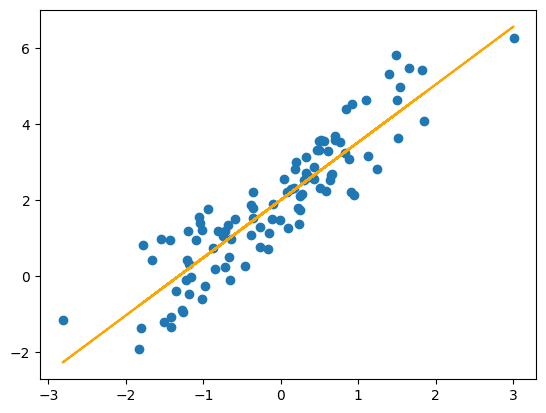

In [72]:
plt.scatter(X, y)
plt.plot(X, np.dot(X, w) + b, color="orange")

# 2 Layer Neural Network for Binary Classification ( 1 Hidden Layer)

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [14]:
def relu(x):
    return np.maximum(x, 0)

In [15]:
def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [20]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

In [75]:
X, y = datasets.make_moons(n_samples=10000, shuffle=True, noise=0.15)
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [76]:
points = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y.flatten()))
points.head()

,x1,x2,label
0,1.355850,-0.445510,1
1,-0.592413,0.883902,0
2,1.048337,-0.458056,1
3,2.053360,0.633734,1
4,1.625535,-0.237617,1


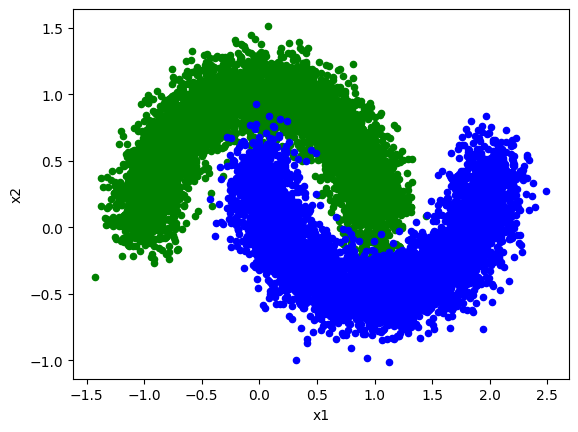

In [77]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue"}

for key, group in points.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

In [78]:
ohe_y = np.zeros((y.size, 2))
ohe_y[np.arange(y.size), y] = 1
y = ohe_y

In [79]:
def train_2layer_nnet(X, y, numb_epochs=1000, lr=1e-3):
    # randomly initialize weights and biases
    numb_input_nodes, numb_h_nodes, numb_output_nodes = 2, 4, 2
    a0 = X # (n, 2)
    w1 = np.random.randn(numb_input_nodes, numb_h_nodes)# (2, 4)
    b1 = np.zeros((1, numb_h_nodes)) # (1, 4) broadcasting will take care of dimensions
    w2 = np.random.randn(numb_h_nodes, numb_output_nodes) # (4, 2)
    b2 = np.zeros((1, numb_output_nodes)) # (1, 2) broadcasting will take care of dimensions
    
#     w1 = np.random.randn(numb_input_nodes, numb_output_nodes)# (2, 4)
#     b1 = np.zeros((1, numb_output_nodes)) # (1, 4) broadcasting will take care of dimensions
    
    for epoch in range(numb_epochs):
        # Forward
        
        # First Layer Forward
        z1 = np.dot(a0, w1) + b1 # (n, 4)
        a1 = relu(z1) # (n, 4)

        # Second Layer Forward
        z2 = np.dot(a1, w2) + b2 # (n, 2)
        a2 = softmax(z2) # (n, 2)
                
        # Calculate Binary Cross Entropy Loss
#         loss = np.mean(-1 * (y * np.log(a2 + 1e-7) + (1 - y) * np.log(1 - a2 + 1e-7)))
        loss = np.mean(np.sum(-1 * y * np.log(a2 + 1e-7), axis=1))
        if (epoch+1) % 1000 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss}")
                    
        # Calculate Gradients (Backpropagation)
        
        # Second Layer
#         dL_da2 = -1 * y / (a2 + 1e-7) + (1 - y) / (1 - a2 + 1e-7) # (n, 2)
#         da2_dz2 = sigmoid_derivative(z2) # (n, 2)
#         dL_dz2 = dL_da2 * da2_dz2 # (n, 2)
        # Combining the partial derivatives for Cross Entropy loss and Softmax loss
        dL_dz2 = a2 - y
        
        dz2_dw2 = a1.T # (4, n)
        dz2_db2 = 1
        dL_dw2 = np.dot(dz2_dw2, dL_dz2) / a1.shape[0] # (4, 2)
        dL_db2 = np.sum(dz2_db2 * dL_dz2, axis=0) / a1.shape[0] # (1, 2)
        
        dz2_da1 = w2.T # (2, 4)
        
        # First Layer
        dL_da1 = np.dot(dL_dz2, dz2_da1) # (n, 4)
        da1_dz1 = relu_derivative(z1) # (n, 4)
        dL_dz1 = dL_da1 * da1_dz1 # (n, 4)
        
        dz1_dw1 = a0.T # (2, n)
        dz1_db1 = 1
        dL_dw1 = np.dot(dz1_dw1, dL_dz1) / a0.shape[0] # (2, 4)
        dL_db1 = np.sum(dz1_db1 * dL_dz1, axis=0) / a0.shape[0] # (1, 4)
        
        # Make Step with Gradients (Gradient Descent)
        
        # Second Layer
        w2 = w2 - lr * dL_dw2
        b2 = b2 - lr * dL_db2
                
        # First Layer
        w1 = w1 - lr * dL_dw1
        b1 = b1 - lr * dL_db1
        
    return w1, b1, w2, b2

In [80]:
w1, b1, w2, b2 = train_2layer_nnet(X, y, 10000, 1e-1)

Epoch: 1000, loss: 0.13981020212597103
Epoch: 2000, loss: 0.06984067029900586
Epoch: 3000, loss: 0.050300725700920035
Epoch: 4000, loss: 0.042289004905221694
Epoch: 5000, loss: 0.03813970188407335
Epoch: 6000, loss: 0.03567770582441301
Epoch: 7000, loss: 0.03406759617941267
Epoch: 8000, loss: 0.0329110692160108
Epoch: 9000, loss: 0.03206777431540521
Epoch: 10000, loss: 0.03143147294257705


In [81]:
a0 = X # (n, 2)

# First Layer Forward
z1 = np.dot(a0, w1) + b1 # (n, 4)
a1 = relu(z1) # (n, 4)

# Second Layer Forward
z2 = np.dot(a1, w2) + b2 # (n, 2)
a2 = sigmoid(z2) # (n, 2)

In [82]:
total = y.shape[0]
correct = (np.argmax(y, axis=1) == np.argmax(a2, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total)}%")

The model got 9895 out of 10000 correct: 98.95%


In [83]:
def find_differences(preds, y):
    diff = np.copy(preds)
    diff[preds != y] = 2
    return diff

In [84]:
diff = find_differences(np.argmax(a2, axis=1), np.argmax(y, axis=1))
diff_df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=diff.flatten()))

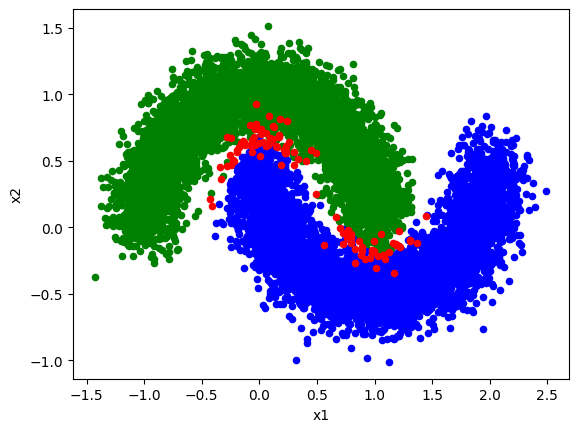

In [87]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue", 2: "red"}
for key, group in diff_df.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

# N Layer Neural Network for Classification/Regression

In [135]:
class Linear:
    def __init__(self, in_features, out_features, bias=True):
        self.weights = np.random.randn(in_features, out_features)
        self.biases = np.zeros((1, out_features)) # broadcasting will take care of dimensions
        self.inputs = 0
        self.dw = 0
        self.db = 0
        self.v_dw = 0
        self.v_db = 0
        
    def forward(self, x):
        self.inputs = x
        z = np.dot(x, self.weights) + self.biases
        return z
    
    def backward(self, dz):
        dz_dw = self.inputs.T
        dz_db = 1
        
        # Accumulate Gradients
        self.dw += np.dot(dz_dw, dz) / self.inputs.shape[0]
        self.db += np.sum(dz_db * dz, axis=0) / self.inputs.shape[0]
        
        # Compute da to be passed back to the previous layer
        dz_da = self.weights.T
        da = np.dot(dz, dz_da)
        return da
    
    def step(self, lr=1e-3, momentum=0.9):
        # Check if Momentum should be used
        if not momentum:
            # Calculate Step without Momentum
            self.v_dw = self.dw
            self.v_db = self.db
        else:
            # Calculate Step with Momentum 
            self.v_dw = momentum * self.v_dw + (1 - momentum) * self.dw
            self.v_db = momentum * self.v_db + (1 - momentum) * self.db
        
        # Make Update
        self.weights -= lr * self.v_dw
        self.biases -= lr * self.v_db
    
    def zero_grad(self):
        self.dw = 0
        self.db = 0
    
    def __call__(self, x):
        return self.forward(x)

In [136]:
class Sigmoid:
    def __init__(self):
        self.inputs = 0
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        self.inputs = x
        return self.sigmoid(x)
    
    def backward(self, da):
        da_dz = self.sigmoid(self.inputs) * (1 - self.sigmoid(self.inputs))
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [137]:
class ReLU:
    def __init__(self):
        self.inputs = 0
    
    def forward(self, x):
        self.inputs = x
        return np.maximum(x, 0)
    
    def backward(self, da):
        da_dz = np.ones(self.inputs.shape)
        da_dz[self.inputs <= 0] = 0
    
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [138]:
class Sequential:
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, x):
        curr_input = x
        for layer in self.layers:
            out = layer.forward(curr_input)
            curr_input = out
            
        return out
    
    def backward(self, da):
        next_grad = da
        for layer in reversed(self.layers):
            next_grad = layer.backward(next_grad)
            
    def step(self, lr=1e-3, momentum=0.9):
        for layer in reversed(self.layers):
            layer.step(lr, momentum)
    
    def zero_grad(self):
        for layer in self.layers:
            layer.zero_grad()
            
    def __call__(self, x):
        return self.forward(x)

In [139]:
class MeanSquaredErrorLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def forward(self, y_hat, y):
        self.y_hat = y_hat
        self.y = y
        self.loss = np.mean((y_hat - y) ** 2)
        return self
    
    def backward(self):
        da = 2 * (self.y_hat - self.y)
        self.model.backward(da)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [141]:
class CrossEntropyLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)
        
    def forward(self, x, y):
        self.y_hat = self.softmax(x)
        self.y = y
        self.loss = np.mean(np.sum(-1 * y * np.log(self.y_hat + 1e-7), axis=1))
        return self
    
    def backward(self):
        # combined gradient for both Cross Entropy and Softmax
        dz = self.y_hat - self.y
        self.model.backward(dz)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [142]:
class Optimizer:
    def __init__(self, model, lr=1e-3, momentum=0.9):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        
    def zero_grad(self):
        self.model.zero_grad()
        
    def step(self):
        self.model.step(self.lr, self.momentum)

In [143]:
def train_binary_classify(X, y, model, numb_epochs=1000, lr=1e-3, momentum=0.9):
    
    loss_fn = CrossEntropyLoss(model)
    optimizer = Optimizer(model, lr=lr, momentum=momentum)
    
    for i in range(numb_epochs+1):
        # Zero Out Gradients
        optimizer.zero_grad()
        
        # Forward
        preds = model(X)
        
        # Calculate Binary Cross Entropy Loss
        loss = loss_fn(preds, y)
        if i % 1000 == 0:
            print("Loss at epoch", i, ":", loss)
        
        # Calculate Gradients (Backpropagation)
        loss.backward()
        
        # Make Step with Gradients (Gradient Descent)
        optimizer.step()
        
    return model

In [146]:
# Create Model
model = Sequential([
    Linear(2, 6),
    ReLU(),
    Linear(6, 3),
    ReLU(),
    Linear(3, 2),
])

In [147]:
model = train_binary_classify(X, y, model, numb_epochs=10000, lr=1e-1, momentum=0.9)

Loss at epoch 0 : 0.6327878374797883
Loss at epoch 1000 : 0.04680686691608225
Loss at epoch 2000 : 0.028698868565797987
Loss at epoch 3000 : 0.02600045241835832
Loss at epoch 4000 : 0.024968794418560775
Loss at epoch 5000 : 0.02440840667165717
Loss at epoch 6000 : 0.024070929752512033
Loss at epoch 7000 : 0.02385333089049932
Loss at epoch 8000 : 0.023697900072727866
Loss at epoch 9000 : 0.023577984712058218
Loss at epoch 10000 : 0.023480606087722452


In [149]:
print("The model got", (np.argmax(y, axis=1) == np.argmax(model(X), axis=1)).sum(), "out of", y.shape[0], "correct")

The model got 9923 out of 10000 correct


In [150]:
diff = find_differences(np.argmax(model(X), axis=1), np.argmax(y, axis=1))
diff_df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=diff.flatten()))

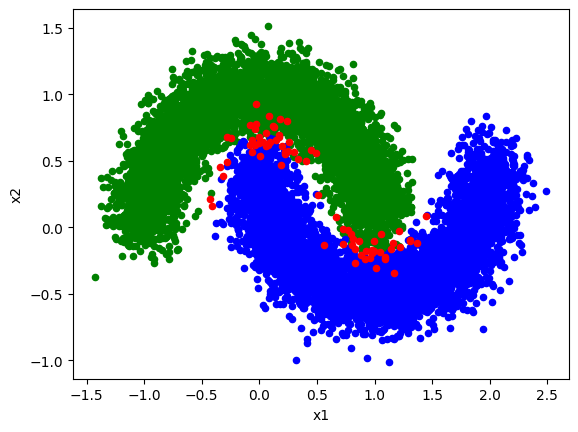

In [151]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue", 2: "red"}
for key, group in diff_df.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()